#### **Statistical Tests and Visualizations with Rodin**

In this Notebook, we will be utilizing the `Rodin` library to conduct statistical tests and visualizations:

- **Statistical Tests Using Rodin**:
  - **t-test**: A comparison of the means between two groups, leveraging Rodin's efficient computation.
  - **One-way ANOVA (Analysis of Variance)**: Comparing means across three or more groups, focusing on a single independent variable, facilitated by Rodin's analytical capabilities.
  - **Two-way ANOVA**: This extends the one-way ANOVA by incorporating two independent variables, allowing us to explore their interactions and individual impacts, all within the Rodin framework.

- **Visualizations in Rodin**:
  - **Scatterplots**: Utilizing Rodin's visualization tools, these plots will help in understanding the relationships and distributions in the data.
  - **Clustergrams**: A unique combination of heatmaps and hierarchical clustering, implemented in Rodin to reveal patterns and correlations within complex datasets.


In [1]:
import rodin

In [2]:
obj=rodin.create_object_csv("./data/features.csv","./data/class_labels.csv",
                            feat_sep=',',class_sep=',')
obj.transform()

Number of features filtered: 1972


< Rodin object > 
dim: 24233 X 71

- **Class Column for Statistical Tests**:
  - Each statistical test in Rodin requires the specification of a 'class' column. This column identifies the different groups or categories within your data that are to be compared.
  - For example, when performing a t-test or one-way ANOVA, you need to specify a single column that represents the distinct classes or groups in your dataset.

- **Two-way ANOVA Requirement**:
  - For a two-way ANOVA, Rodin requires a list of two columns, formatted as `['col1', 'col2']`. These columns represent the two independent variables whose interaction and individual effects on the dependent variable you wish to analyze.


In [3]:
obj.ttest('Sex')
obj.oneway_anova('Dose')
obj.twoway_anova(['Dose','Sex'])

Processing ANOVA:   0%|          | 0/24233 [00:00<?, ?it/s]

mz   time  p_value(tt) Sex  p_adj(tt) Sex  p_value(owa) Dose  \
0       85.0284   38.3     2.712304e-01   7.992798e-01       4.113913e-01   
1       85.0285  213.1     6.850175e-01   9.331305e-01       3.088595e-03   
2       85.0285  213.1     1.419902e-37   3.823164e-34       9.725732e-01   
3       85.0285   69.4     3.274544e-40   1.587040e-36       9.038740e-01   
4       85.0285   69.4     3.080491e-01   8.113496e-01       8.046424e-03   
...         ...    ...              ...            ...                ...   
24228  845.6749  294.9     1.389644e-02   4.797042e-01       2.844420e-01   
24229  845.7611  293.1     1.415972e-01   7.563197e-01       2.921493e-09   
24230  845.8602  287.9     2.656356e-01   7.968894e-01       8.848956e-07   
24231  845.8797  290.9     2.754508e-01   8.002018e-01       1.272754e-03   
24232  845.9062   57.2     5.448998e-01   8.961378e-01       3.698379e-01   

       p_adj(owa) Dose  p_value(twa) Dose  p_adj(twa) Dose  p_value(twa) Sex  \
0         5.525192e-01       4.071258e-01     5.458603e-01      2.669166e-01   
1         2.654110e-02       3.682498e-03     2.906648e-02      6.458823e-01   
2         9.795663e-01       6.619586e-01     7.468686e-01      2.886259e-40   
3         9.299141e-01       1.833060e-01     3.398665e-01      2.145519e-42   
4         4.931699e-02       5.414461e-03     3.774590e-02      2.353962e-01   
...                ...                ...              ...               ...   
24228     4.436145e-01       2.665926e-01     4.244081e-01      1.813262e-02   
24229     3.994310e-07       2.851373e-09     3.817531e-07      9.378623e-02   
24230     5.811294e-05       1.200633e-06     7.253200e-05      2.383823e-01   
24231     1.485677e-02       1.147947e-03     1.355003e-02      3.193043e-01   
24232     5.196070e-01       3.807730e-01     5.254719e-01      5.432106e-01   

       p_adj(twa) Sex  p_value(twa) Dose * Sex  p_adj(twa) Dose * Sex  
0        7.674184e-01                 0.279959               0.915476  
1        9.134816e-01                 0.671831               0.967725  
2        9.991815e-37                 0.000508               0.208827  
3        8.665393e-39                 0.008875               0.588407  
4        7.579362e-01                 0.024460               0.693177  
...               ...                      ...                    ...  
24228    4.682307e-01                 0.684760               0.968410  
24229    6.815865e-01                 0.545189               0.958258  
24230    7.586924e-01                 0.805139               0.978385  
24231    7.919048e-01                 0.183312               0.878441  
24232    8.805053e-01                 0.723871               0.970672  

[24233 rows x 12 columns]

**Feature Selection from Two-Way ANOVA Results**

We will now select features based on adjusted p-values from the two-way ANOVA conducted with the `Rodin` library. This process involves:

- Identifying features with p-values below a specified significance threshold.
- Filtering these features to focus on those with statistically significant differences across the groups.


In [15]:
obj_sliced = obj[obj.features[obj.features['p_value(twa) Dose * Sex']<0.01]]
obj_sliced

< Rodin object > 
dim: 386 X 71
dr: umap, t-sne

**Dimensionality reduction methods** can be executed using the `Rodin` library as follows:

- The library provides options for various dimensionality reduction techniques, which are crucial for analyzing and visualizing high-dimensional data in a more interpretable form.
- By default, these methods are configured to use `n_components=2`, reducing the data to two dimensions. This default setting is often suitable for visualization purposes, like in scatter plots or cluster maps.

Running these methods with the default settings simplifies the process, offering a quick and effective way to gain insights from complex datasets.


In [16]:
obj_sliced.run_umap()
obj_sliced.run_tsne()

In [17]:
obj_sliced

< Rodin object > 
dim: 386 X 71
dr: umap, t-sne

The `plot` function:

- Uses UMAP by default for dimensionality reduction.
- Allows users to specify columns to color points, and to change their size or shape for customized visualizations.


<Axes: title={'center': 'Dose * Sex'}, xlabel='umap_1', ylabel='umap_2'>

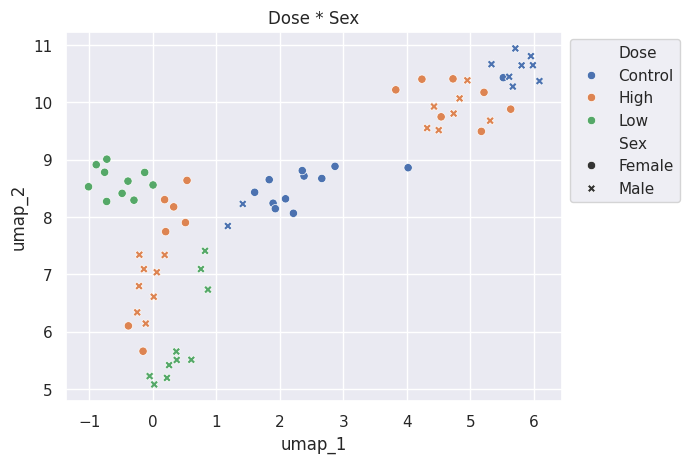

In [18]:
obj_sliced.plot(hue='Dose',markers='Sex',title='Dose * Sex')

- Both UMAP and t-SNE functions can also leverage previously calculated PCA components.

In [19]:
obj_sliced.run_pca(n_components=15,custom_name='pca_15')
obj_sliced.run_umap(use_pca=True,pca_name='pca_15',custom_name='umap_pca',)

In [20]:
obj_sliced

< Rodin object > 
dim: 386 X 71
dr: umap, t-sne, pca_15, umap_pca

<Axes: xlabel='umap_pca_1', ylabel='umap_pca_2'>

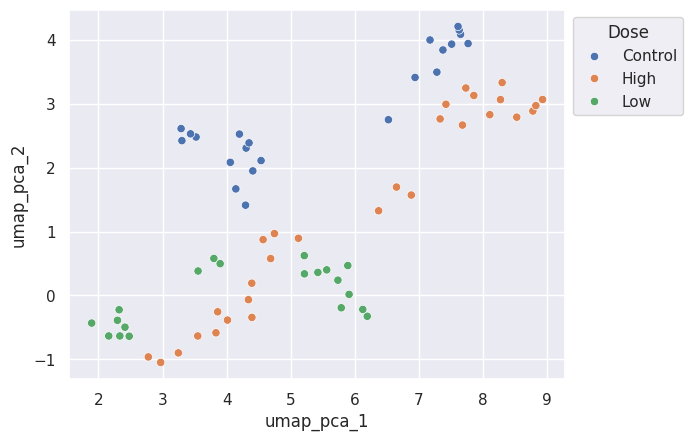

In [21]:
obj_sliced.plot(dr_name='umap_pca',hue='Dose')

The `Rodin` library integrates seamlessly with seaborn for figure styling:

- Since Rodin utilizes seaborn for creating figures, users can customize styles by importing and specifying seaborn settings.
- Plot functions in Rodin support the original parameters of seaborn, allowing for extensive customization and flexibility in visual presentations.


<Axes: xlabel='t-sne_1', ylabel='t-sne_2'>

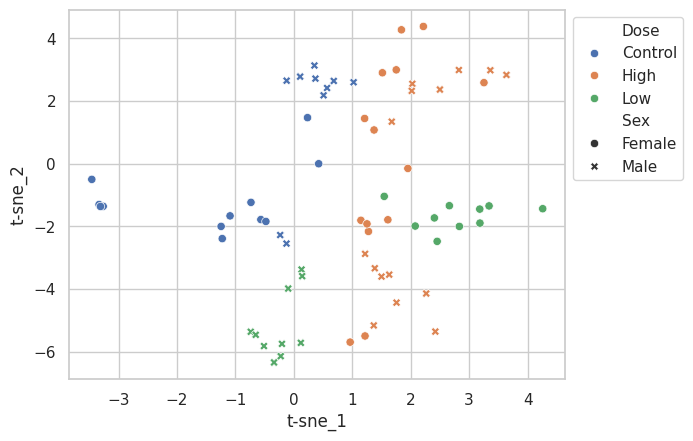

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
obj_sliced.plot(dr_name='t-sne',hue='Dose',markers='Sex')

**Clustergrams in Rodin: Dash-Bio and Seaborn Integration**

In the `Rodin` library, clustergram visualization is primarily powered by `dash-bio`:

- By default, `dash-bio` is used for creating interactive clustergrams, providing dynamic and engaging data visualizations.
- If the `interactive` parameter is set to `False`, Rodin will generate a static clustergram using seaborn.
- Additionally, standardization of rows is enabled and `ward` method is used by default.

**Pro Tip**: While working in notebooks, press `Shift` + `Tab` when your cursor is on a function to view detailed information about the function and its parameters. This shortcut is invaluable for quickly accessing documentation and understanding the functionality at hand.


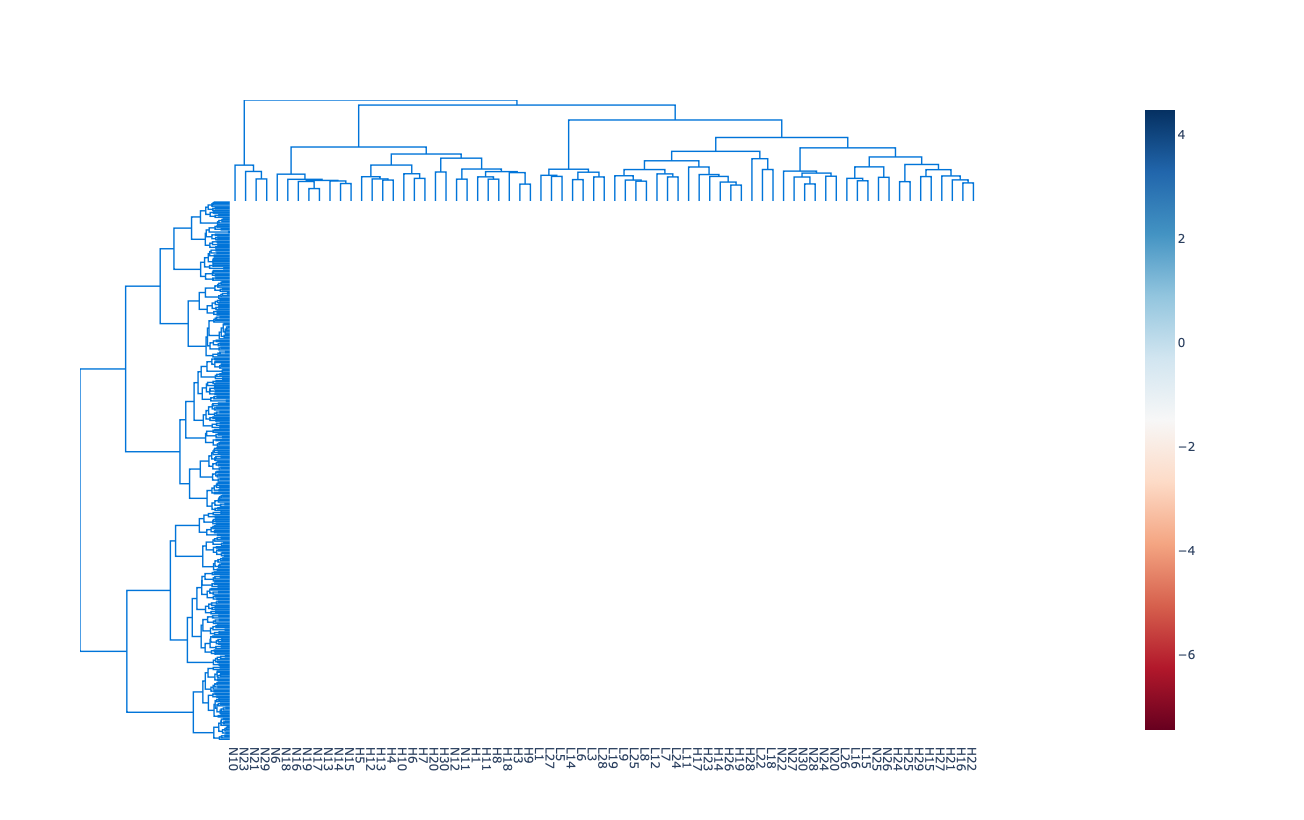

In [23]:
obj_sliced.clustergram(width=1300)